X_train.shape:(284, 80)
Features selected is 50 percent of all features
X_train_selected.shape:(284, 40)
[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]
Linear model score:0.91929825
Linear model score on discarding noise:0.91929825


C:\Users\abhin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abhin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

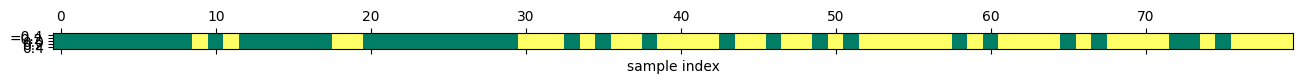

In [9]:
#Univariate statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, 
                                                    random_state=0, test_size=0.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
print("X_train.shape:{}".format(X_train.shape))
print("Features selected is 50 percent of all features")
print("X_train_selected.shape:{}".format(X_train_selected.shape))

mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='summer_r')
plt.xlabel("sample index")

#lets now fit a model and see whether there is change in accuracy on discarding noise features
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Linear model score:{:.8f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("Linear model score on discarding noise:{:.8f}".format(lr.score(X_test_selected, y_test)))

Linear model score:0.926
Linear model score removing noise:0.958


C:\Users\abhin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abhin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Text(0.5, 0, 'Sample index')

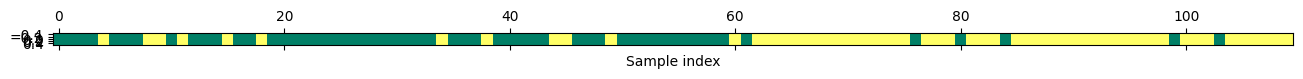

In [15]:
#Model based feature selection

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, X_w_noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target,
                                                   random_state=0, test_size=0.5)

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                        threshold='median')
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

lr = LogisticRegression()

lr.fit(X_train, y_train)
print("Linear model score:{:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("Linear model score removing noise:{:.3f}".format(lr.score(X_test_selected, y_test)))

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='summer_r')
plt.xlabel("Sample index")

X_train.shape:(284, 80)
X_train_selected.shape:(284, 40)
Linear model score:0.919
Linear model score removing noise:0.930
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False False False
 False False False False False False False False False False False  True
  True False  True False False  True  True False False False  True False
 False False False False False  True False  True False False False False
 False  True False False False  True False False]


C:\Users\abhin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abhin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Text(0.5, 0, 'Sample index')

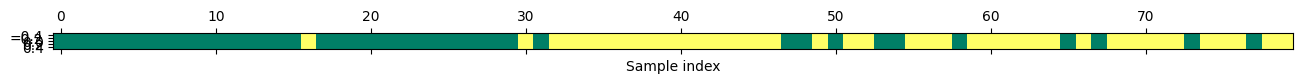

In [14]:
#Iterative feature selection

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target,
                                                   random_state=0, test_size=0.5)

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), 
            n_features_to_select=40)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

print("X_train.shape:{}".format(X_train.shape))
print("X_train_selected.shape:{}".format(X_train_selected.shape))

lr = LogisticRegression()

lr.fit(X_train, y_train)
print("Linear model score:{:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("Linear model score removing noise:{:.3f}".format(lr.score(X_test_selected, y_test)))

mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='summer_r')
plt.xlabel("Sample index")

#if the scores are the same, then it means linear model would predict the same as random forests if 
# features are selected properly